Zipf’s law:     r * freq = A * N r = word rank freq = word frequency A = constant. N = total number of words in collections 
Learn and understand Zipf’s Law. 
 Pick any file (or files) in NLTK package.
 Prove if Zipf’s Law works in Natural Language or not. 

In [10]:
import nltk
from nltk.corpus import inaugural
print(inaugural.fileids())
import glob

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

In [11]:
path =  nltk.data.find('corpora/inaugural/2009-Obama.txt')
data = glob.glob(path)
for words in data:
    with open(words) as text:
        t = text.read()  

In [12]:
import re
words = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)',t )

#print(words)
N = len(words) # N = total number of words in the file
print(N)


1895


In [13]:
d=dict()
for c in words:
    if c not in d:
        d[c]=1
    else:
        d[c] += 1

sorted_words = sorted(d.items(), key = lambda x : x[1] ,reverse = True)
print('Words and their frequency is : ' + str(sorted_words))

Words and their frequency is : [('the', 126), ('and', 105), ('our', 58), ('that', 48), ('are', 22), ('this', 20), ('will', 19), ('but', 17), ('have', 16), ('not', 16), ('for', 15), ('who', 14), ('has', 14), ('you', 14), ('can', 13), ('nation', 12), ('with', 11), ('new', 11), ('they', 11), ('those', 10), ('America', 10), ('Our', 9), ('The', 9), ('their', 9), ('For', 8), ('must', 8), ('than', 8), ('every', 8), ('been', 8), ('because', 8), ('its', 7), ('all', 7), ('these', 7), ('when', 7), ('world', 7), ('less', 6), ('cannot', 6), ('too', 6), ('people', 6), ('They', 6), ('common', 6), ('And', 6), ('work', 6), ('from', 5), ('day', 5), ('what', 5), ('generation', 5), ('time', 5), ('now', 5), ('more', 5), ('only', 5), ('today', 5), ('know', 5), ('God', 5), ('let', 5), ('spirit', 5), ('was', 5), ('them', 4), ('seek', 4), ('whether', 4), ('before', 4), ('long', 4), ('peace', 4), ('nor', 4), ('greater', 4), ('which', 4), ('women', 4), ('crisis', 4), ('hard', 4), ('meet', 4), ('men', 4), ('end',

In [14]:
import csv
with open(('2009-Obama.csv'), 'w', newline="") as csvfile:
            csv_output = csv.writer(csvfile)
            csv_output.writerow(['Word', 'Freq', 'Rank'])
            rank = 1
            for row in sorted_words:
                csv_output.writerow([row[0], row[1], rank])
                rank +=1
                csvfile.close


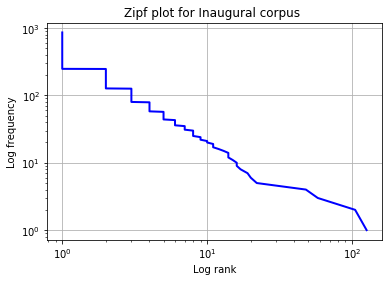

In [21]:
import matplotlib.pyplot as plt
csvfile = open('2009-Obama.csv', 'r')
w=[]
f=[]
r=[]
csv_f=csv.reader(csvfile)
for row in csv_f:
    w.append(row[0])
    f.append(row[1])
    r.append(row[2])
r.pop(0)
f.pop(0)
plt.loglog(f,r,color='b',linewidth=2)
plt.grid(True)
plt.title("Zipf plot for Inaugural corpus ")
plt.xlabel("Log rank")
plt.ylabel("Log frequency")
plt.show()